## محاسبه جدول داده-ستانده از جدول عرضه و مصرف

### 1. معرفی
در این بخش، قصد داریم با استفاده از داده‌های جدول عرضه و مصرف (Supply and Use Tables - SUT)، جدول داده-ستانده (Input-Output Table - IOT) را استخراج کنیم. این کار بر اساس دو مدل زیر انجام می‌شود:

- **Model B:** محصول-به-محصول بر اساس فرضیه تکنولوژی صنعت
- **Model D:** صنعت-به-صنعت بر اساس فرضیه ساختار فروش ثابت محصول

### 2. مسیر فایل و اطلاعات شیت‌ها
فایل اکسل حاوی داده‌ها در مسیر زیر قرار دارد:

```
D:\IO_HORMZ\base_data\final_SUT_VF.xlsx
```

#### 2.1. جدول عرضه (Sheet: `make_tbl_for_sym`)
- **\(V^t\)**: محدوده `B2:CB110`
- **\(g^t\)**: محدوده `B111:CB111`
- **\(x\)**: محدوده `CC2:CC110`
- **\(m\)**: محدوده `CG2:CG110`
- **\(q\)**: محدوده `CF2:CF110`

#### 2.2. جدول مصرف (Sheet: `use_tbl_for_sym`)
- **\(U_d\)**: محدوده `B2:CB110`
- **\(Y_d\)**: محدوده `CC2:CK110`
- **\(x\)**: محدوده `CL2:CL110`
- **\(W\)**: محدوده `B115:CB115`
- **\(w\)**: محدوده `CL115:CL115`
- **\(g^t\)**: محدوده `B116:CB116`
- **\(y\)**: محدوده `CC115:CK115`
- **industries**: محدوده `B1:CB1`
- **products**: محدوده `A1:A110`
- **Final use**: محدوده `CC1:CK1`
#### 2.3. جدول واردات (Sheet: `imports`)
- **\(U_m\)**: محدوده `B2:CB110`
- **\(Y_m\)**: محدوده `CC2:CI110`
- **\(m\)**: محدوده `CL2:CL110`

### 3. خروجی مورد انتظار
دو ماتریس مورد انتظار به صورت زیر هستند:

1. **Input-output table - product-by-product**
2. **Input-output table - industry-by-industry**

این خروجی‌ها در یک فایل اکسل با نام `sut_iot.xlsx` ذخیره خواهند شد.

### 4. برنامه پایتونی
کد پایتون موردنیاز برای محاسبه و ذخیره داده‌ها در ادامه ارائه خواهد شد.


### ابعاد ماتریس‌ها در تبدیل جدول عرضه و مصرف به جدول داده-ستانده  

#### جدول عرضه (Supply Table)  
- ماتریس \( V^t \) از محدوده `B2:CB110`  
  $$ V^t \in \mathbb{R}^{109 \times 81} $$  

- بردار \( g^t \) از محدوده `B111:CB111`  
  $$ g^t \in \mathbb{R}^{1 \times 81} $$  

- بردار \( x \) از محدوده `CC2:CC110`  
  $$ x \in \mathbb{R}^{109 \times 1} $$  

- ماتریس \( m \) از محدوده `CD2:CE110`  
  $$ m \in \mathbb{R}^{109 \times 2} $$  

- بردار \( q \) از محدوده `CF2:CF110`  
  $$ q \in \mathbb{R}^{109 \times 1} $$  

#### جدول مصرف (Use Table)  
- ماتریس \( U_d \) از محدوده `B2:CB110`  
  $$ U_d \in \mathbb{R}^{109 \times 81} $$  

- ماتریس \( Y_d \) از محدوده `CC2:CK110`  
  $$ Y_d \in \mathbb{R}^{109 \times 9} $$  

- ماتریس \( U_m \) از محدوده `B111:CB112`  
  $$ U_m \in \mathbb{R}^{2 \times 81} $$  

- ماتریس \( Y_m \) از محدوده `CC111:CK112`  
  $$ Y_m \in \mathbb{R}^{2 \times 9} $$  

- بردار \( x \) از محدوده `CL2:CL110`  
  $$ x \in \mathbb{R}^{109 \times 1} $$  

- بردار \( m \) از محدوده `CL111:CL112`  
  $$ m \in \mathbb{R}^{2 \times 1} $$  

- بردار \( W \) از محدوده `B115:CB115`  
  $$ W \in \mathbb{R}^{1 \times 81} $$  

- بردار \( w \) از محدوده `CL115:CL115`  
  $$ w \in \mathbb{R}^{1 \times 1} $$  

- بردار \( g^t \) از محدوده `B116:CB116`  
  $$ g^t \in \mathbb{R}^{1 \times 81} $$  

- بردار \( y \) از محدوده `CC115:CK115`  
  $$ y \in \mathbb{R}^{1 \times 9} $$  

#### ماتریس‌های داده-ستانده (Input-Output Tables)  
- **ماتریس محصول-محصول** (Product-by-Product IOT) بر اساس Model B:  
  $$ Z_{pp} \in \mathbb{R}^{109 \times 109} $$  

- **ماتریس صنعت-صنعت** (Industry-by-Industry IOT) بر اساس Model D:  
  $$ Z_{ii} \in \mathbb{R}^{81 \times 81} $$


فایل اکسل `sut_iot.xlsx` شامل شیت‌های زیر خواهد بود:

- **S_d_B**: ماتریس واسطه‌ای داخلی بر اساس Model B.
- **S_m_B**: ماتریس واسطه‌ای وارداتی بر اساس Model B.
- **E_B**: ماتریس ارزش افزوده بر اساس Model B.
- **B_d_D**: ماتریس واسطه‌ای داخلی بر اساس Model D.
- **B_m_D**: ماتریس واسطه‌ای وارداتی بر اساس Model D.
- **W_D**: ماتریس ارزش افزوده بر اساس Model D.



In [1]:
import numpy as np
import pandas as pd

# ------------------------------
# 1. خواندن داده‌ها از فایل اکسل
# ------------------------------
file_path = r"D:\IO_HORMZ\base_data\final_SUT_VF_values.xlsx"

# خواندن جدول عرضه (make_tbl_for_sym)
supply_sheet = "make_tbl_for_sym"
V_T = pd.read_excel(file_path, sheet_name=supply_sheet, header=None, usecols="B:CB", skiprows=1, nrows=109).values  # B2:CB110
g_T = pd.read_excel(file_path, sheet_name=supply_sheet, header=None, usecols="B:CB", skiprows=110, nrows=1).values.flatten()  # B111:CB111
x = pd.read_excel(file_path, sheet_name=supply_sheet, header=None, usecols="CC", skiprows=1, nrows=109).values.flatten()  # CC2:CC110
m = pd.read_excel(file_path, sheet_name=supply_sheet, header=None, usecols="CG", skiprows=1, nrows=109).values.flatten()  # CG2:CG110
q = pd.read_excel(file_path, sheet_name=supply_sheet, header=None, usecols="CF", skiprows=1, nrows=109).values.flatten()  # CF2:CF110

# خواندن جدول مصرف (use_tbl_for_sym)
use_sheet = "use_tbl_for_sym"
U_d = pd.read_excel(file_path, sheet_name=use_sheet, header=None, usecols="B:CB", skiprows=1, nrows=109).values  # B2:CB110
Y_d = pd.read_excel(file_path, sheet_name=use_sheet, header=None, usecols="CC:CK", skiprows=1, nrows=109).values  # CC2:CK110
W = pd.read_excel(file_path, sheet_name=use_sheet, header=None, usecols="B:CB", skiprows=114, nrows=1).values.flatten()  # B115:CB115
g_T_use = pd.read_excel(file_path, sheet_name=use_sheet, header=None, usecols="B:CB", skiprows=115, nrows=1).values.flatten()  # B116:CB116
y = pd.read_excel(file_path, sheet_name=use_sheet, header=None, usecols="CC:CK", skiprows=114, nrows=1).values.flatten()  # CC115:CK115

# خواندن جدول واردات (imports)
imp_sheet = "imports"
U_m = pd.read_excel(file_path, sheet_name=imp_sheet, header=None, usecols="B:CB", skiprows=1, nrows=109).values  # B2:CB110
Y_m = pd.read_excel(file_path, sheet_name=imp_sheet, header=None, usecols="CC:CK", skiprows=1, nrows=109).values  # CC2:CI110
m_imp = pd.read_excel(file_path, sheet_name=imp_sheet, header=None, usecols="CL", skiprows=1, nrows=109).values.flatten()  # CL2:CL110

# خواندن نام صنایع و محصولات
industries = pd.read_excel(file_path, sheet_name=use_sheet, header=0, usecols="B:CB", nrows=0).columns.tolist()  # B1:CB1
products = pd.read_excel(file_path, sheet_name=use_sheet, header=None, usecols="A", skiprows=1, nrows=109).values.flatten()  # A2:A110
final_use_labels = pd.read_excel(file_path, sheet_name=use_sheet, header=0, usecols="CC:CK", nrows=0).columns.tolist()  # CC1:CK1

# چاپ ابعاد داده‌های استخراج شده
print("\nابعاد داده‌های استخراج شده:")
print("----------------------------")
print(f"V_T (Make Matrix): {V_T.shape}")
print(f"g_T (Industry Output): {g_T.shape}")
print(f"x (Product Output): {x.shape}")
print(f"m (Imports): {m.shape}")
print(f"q (Total Supply): {q.shape}")
print(f"U_d (Domestic Use): {U_d.shape}")
print(f"Y_d (Domestic Final Use): {Y_d.shape}")
print(f"U_m (Imported Use): {U_m.shape}")
print(f"Y_m (Imported Final Use): {Y_m.shape}")
print(f"W (Value Added): {W.shape}")
print(f"g_T_use (Industry Output in Use): {g_T_use.shape}")
print(f"y (Final Use): {y.shape}")
print(f"m_imp (Imports in Use): {m_imp.shape}")


ابعاد داده‌های استخراج شده:
----------------------------
V_T (Make Matrix): (109, 79)
g_T (Industry Output): (79,)
x (Product Output): (109,)
m (Imports): (109,)
q (Total Supply): (109,)
U_d (Domestic Use): (109, 79)
Y_d (Domestic Final Use): (109, 9)
U_m (Imported Use): (109, 79)
Y_m (Imported Final Use): (109, 9)
W (Value Added): (79,)
g_T_use (Industry Output in Use): (79,)
y (Final Use): (9,)
m_imp (Imports in Use): (109,)


In [2]:
# ------------------------------
# 2. محاسبه ماتریس‌های تبدیل
# ------------------------------
def calculate_transformation_matrices(V_T, g_T, x):
    # جایگزینی صفرها برای جلوگیری از تقسیم بر صفر
    g_T = np.where(g_T == 0, 1e-10, g_T)
    x = np.where(x == 0, 1e-10, x)
    
    # ماتریس تبدیل Model B (C = V^T * ĝ^{-1})
    C = V_T @ np.diag(1 / g_T)
    T_B = C.T  # Transpose برای تطابق ابعاد
    
    # ماتریس تبدیل Model D (D = V * x̂^{-1})
    D = V_T.T @ np.diag(1 / x)
    T_D = D
    
    return T_B, T_D

T_B, T_D = calculate_transformation_matrices(V_T, g_T, x)
print("ابعاد ماتریس T_B:", T_B.shape)
print("ابعاد ماتریس T_D:", T_D.shape)
# ------------------------------
# 3. محاسبه جداول داده-ستانده
# ------------------------------
def calculate_io_tables(U_d, Y_d, U_m, Y_m, W, T_B, T_D):
    # مدل B: Product-by-Product
    S_d_B = U_d @ T_B  # Domestic intermediates
    S_m_B = U_m @ T_B  # Imported intermediates
    E_B = W @ T_B      # GVA
    
    # مدل D: Industry-by-Industry
    B_d_D = T_D @ U_d  # Domestic intermediates
    B_m_D = T_D @ U_m  # Imported intermediates
    W_D = W            # GVA
    F_d=T_D@Y_d
    F_m=T_D@Y_m
    
    return S_d_B, S_m_B, E_B, B_d_D, B_m_D, W_D,F_d,F_m

S_d_B, S_m_B, E_B, B_d_D, B_m_D, W_D,F_d,F_m = calculate_io_tables(U_d, Y_d, U_m, Y_m, W, T_B, T_D)
print("ابعاد ماتریس S_d_B:", S_d_B.shape)
print("ابعاد ماتریس S_m_B:", S_m_B.shape)
print("ابعاد ماتریس E_B:", E_B.shape)
print("ابعاد ماتریس B_d_D:", B_d_D.shape)
print("ابعاد ماتریس B_m_D:", B_m_D.shape)
print("ابعاد ماتریس W_D:", W_D.shape)
print("ابعاد ماتریس F_m:", F_m.shape)
print("ابعاد ماتریس Fd:", F_d.shape)
# ------------------------------
# 4. ساختاردهی به جداول مطابق PDF
# ------------------------------
# ساختار جدول Product-by-Product (Model B)
io_product_df = pd.DataFrame(
    data=np.hstack([S_d_B, Y_d, x.reshape(-1, 1)]),
    index=products,
    columns=products.tolist() + final_use_labels + ["Use"]
)
io_product_df.loc["GVA"] = np.hstack([E_B, np.zeros(len(final_use_labels)), 0])
io_product_df.loc["Output"] = np.hstack([x, y, 0])

# ساختار جدول Industry-by-Industry (Model D)
io_industry_df = pd.DataFrame(
    data=np.hstack([B_d_D, F_d, g_T.reshape(-1, 1)]),
    index=industries,
    columns=industries + final_use_labels + ["Output"]
)
io_industry_df.loc["GVA"] = np.hstack([W_D, np.zeros(len(final_use_labels)), 0])
iom_industry_df = pd.DataFrame(
    data=np.hstack([B_m_D, F_m]),
    index=industries,
    columns=industries + final_use_labels 
)
iom_product_df = pd.DataFrame(
    data=np.hstack([S_m_B, Y_m]),
    index=products,
    columns=list(products) + final_use_labels
)

# ------------------------------
# 5. ذخیره‌سازی در اکسل
# ------------------------------
output_path = r"D:\IO_HORMZ\base_data\sut_iot_1400_new.xlsx"
with pd.ExcelWriter(output_path) as writer:
    # Product-by-Product (Model B)
    io_product_df.to_excel(writer, sheet_name="IOT_D_B")
    iom_product_df.to_excel(writer, sheet_name="IOT_M_B")
    # Industry-by-Industry (Model D)
    io_industry_df.to_excel(writer, sheet_name="IOT_D_D")
    iom_industry_df.to_excel(writer, sheet_name="IOT_M_D")

print("خروجی با موفقیت در sut_iot_1400.xlsx ذخیره شد!")

ابعاد ماتریس T_B: (79, 109)
ابعاد ماتریس T_D: (79, 109)
ابعاد ماتریس S_d_B: (109, 109)
ابعاد ماتریس S_m_B: (109, 109)
ابعاد ماتریس E_B: (109,)
ابعاد ماتریس B_d_D: (79, 79)
ابعاد ماتریس B_m_D: (79, 79)
ابعاد ماتریس W_D: (79,)
ابعاد ماتریس F_m: (79, 9)
ابعاد ماتریس Fd: (79, 9)
خروجی با موفقیت در sut_iot_1400.xlsx ذخیره شد!


In [3]:
A_B = U_d @ T_B @ np.linalg.inv(np.diag(q.flatten())) #(109, 109)
A_B = pd.DataFrame(A_B, index=products)
A_B.columns=A_B.index
A_B
# A_B.columns=A_B.index
A_D = T_D @ U_d @ np.linalg.inv(np.diag(g_T.flatten())) #(79, 79)
A_D = pd.DataFrame(A_D, index=industries)
A_D.columns=A_D.index
A_D
# A_D.columns=V_prime.columns
A_D.shape
# Define the identity matrix
Ia = np.identity(len(A_B))
Id = np.identity(len(A_D))
# Calculate q and g vectors
L_B = np.linalg.inv(Ia - A_B)
L_D = np.linalg.inv(Id - A_D)

L_B=pd.DataFrame(L_B)
L_D=pd.DataFrame(L_D)
L_B.columns=list(products)
L_B.index=list(products)

L_D.columns=industries
L_D.index=industries

In [5]:
converter_df = pd.read_excel(r"D:\IO_HORMZ\base_data\IO_maket.xlsx",
                             sheet_name="fehrest",header=0)
io_conversion = pd.read_excel(r"D:\IO_HORMZ\base_data\IO_maket.xlsx",
                             sheet_name="io_row_new",header=0)
act_sh = pd.read_excel(r"D:\IO_HORMZ\base_data\IO_maket.xlsx",
                             sheet_name="io_cols",header=0)
FD_cols = pd.read_excel(r"D:\IO_HORMZ\base_data\IO_maket.xlsx",
                             sheet_name="FD",header=0)
rr_codes = pd.read_excel(r"D:\IO_HORMZ\base_data\IO_maket.xlsx",
                             sheet_name="rr_codes_sharh",header=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b_ij = L_B
b_dot_j = np.sum(L_B, axis=0)
b_i_dot = np.sum(L_B, axis=1)
b_dot_dot = L_B.values.sum()
no = L_B.shape[0]
B_star = b_dot_dot / (no**2)
xxx=no * B_star
U_j_B = no*b_dot_j / b_dot_dot
U_i_B = no*b_i_dot / b_dot_dot


U_j_B=pd.DataFrame(U_j_B)
U_i_B=pd.DataFrame(U_i_B)
U_j_B.index=A_B.index
U_i_B.index=A_B.index

b_ij = L_D
b_dot_j = np.sum(L_D, axis=0)
b_i_dot = np.sum(L_D, axis=1)
b_dot_dot = L_B.values.sum()
no = L_D.shape[0]
B_star = b_dot_dot / (no**2)
U_j_D = no*b_dot_j / b_dot_dot
U_i_D = no*b_i_dot / b_dot_dot

U_j_D=pd.DataFrame(U_j_D)
U_i_D=pd.DataFrame(U_i_D)
U_j_D.index=A_D.index
U_i_D.index=A_D.index
## CV coeficient of variation

def calculate_V_j(B):
    n = B.shape[0]
    V_j = np.zeros(B.shape[1])
    
    for j in range(B.shape[1]):
        bj = np.sum(B.iloc[:, j].values)  # Sum of elements in j-th column
        V_j[j] = np.sqrt(np.sum((B.iloc[:, j].values - bj/n)**2) / (n-1)) / (bj/n)
    
    return V_j

def calculate_V_i(B):
    n = B.shape[1]
    V_i = np.zeros(B.shape[0])
    
    for i in range(B.shape[0]):
        bi = np.sum(B.iloc[i, :].values)  # Sum of elements in i-th row
        V_i[i] = np.sqrt(np.sum((B.iloc[i, :].values - bi/n)**2) / (n-1)) / (bi/n)
    
    return V_i

# Calculate V_.j for all j
V_B_j = calculate_V_j(L_B)
# Calculate V_i. for all i
V_B_i = calculate_V_i(L_B)

V_D_j = calculate_V_j(L_D)
V_D_i = calculate_V_i(L_D)


V_B_j=pd.DataFrame(V_B_j)
V_B_i=pd.DataFrame(V_B_i)
V_D_j=pd.DataFrame(V_D_j)
V_D_i=pd.DataFrame(V_D_i)

V_B_j.index=A_B.index
V_B_i.index=A_B.index
V_D_j.index=A_D.index
V_D_i.index=A_D.index
# Create a Pandas Excel writer

# Create a Pandas Excel writer
writer = pd.ExcelWriter('hormz_iot_v1400_vf1400_new.xlsx', engine='xlsxwriter')
# Export dataframes to specific sheets
converter_df.to_excel(writer, sheet_name='tables_list', startcol=0, startrow=0, header=True, index=False)
# V_T.to_excel(writer, sheet_name='supply', startcol=0, startrow=0, header=True, index=True)
# U.to_excel(writer, sheet_name='use', startcol=0, startrow=0, header=True, index=True)
# Y.to_excel(writer, sheet_name='use', startcol=81, startrow=0, header=True, index=False)
# g.transpose().to_excel(writer, sheet_name='use', startcol=1, startrow=111, header=False, index=False)

# B_D.to_excel(writer, sheet_name='IOT_79', startcol=0, startrow=0, header=True, index=True)
# F_D.to_excel(writer, sheet_name='IOT_79', startcol=81, startrow=0, header=True, index=False)
# W_D.to_excel(writer, sheet_name='IOT_79', startcol=1, startrow=81, header=False, index=False)

# S_B.to_excel(writer, sheet_name='IOT_109', startcol=0, startrow=0, header=True, index=True)
# F_B.to_excel(writer, sheet_name='IOT_109', startcol=111, startrow=0, header=True, index=False)
# E_B.to_excel(writer, sheet_name='IOT_109', startcol=1, startrow=111, header=False, index=False)

A_D.to_excel(writer, sheet_name='IOT_109_COEF', startcol=0, startrow=0, header=True, index=True)
A_B.to_excel(writer, sheet_name='IOT_79_COEF', startcol=0, startrow=0, header=True, index=True)

io_conversion.to_excel(writer, sheet_name='io_row_convertor', startcol=0, startrow=0, header=True, index=False)

act_sh.to_excel(writer, sheet_name='activity_sharh', startcol=0, startrow=0, header=True, index=False)

rr_codes.to_excel(writer, sheet_name='rr_codes_sharh', startcol=0, startrow=0, header=True, index=False)

L_B.to_excel(writer, sheet_name='leontieg_matrix_109', startcol=0, startrow=0, header=True, index=True)
L_D.to_excel(writer, sheet_name='leontieg_matrix_79', startcol=0, startrow=0, header=True, index=True)
# U_i_B.to_excel(writer, sheet_name='U_i_B', startcol=0, startrow=0, header=True, index=True)
# U_i_D.to_excel(writer, sheet_name='U_i_D', startcol=0, startrow=0, header=True, index=True)
# U_j_B.to_excel(writer, sheet_name='U_j_B', startcol=0, startrow=0, header=True, index=True)
# U_j_D.to_excel(writer, sheet_name='U_j_D', startcol=0, startrow=0, header=True, index=True)

# V_B_j.to_excel(writer, sheet_name='V_B_j', startcol=0, startrow=0, header=True, index=True)
# V_B_i.to_excel(writer, sheet_name='V_B_i', startcol=0, startrow=0, header=True, index=True)

# V_D_i.to_excel(writer, sheet_name='V_D_i', startcol=0, startrow=0, header=True, index=True)
# V_D_j.to_excel(writer, sheet_name='V_D_j', startcol=0, startrow=0, header=True, index=True)
U_ij_B = pd.concat([U_i_B, U_j_B], axis=1)
U_ij_B.index.name = 'rows'
U_ij_B.columns = ['U_i_B', 'U_j_B']
U_ij_B.to_excel(writer, sheet_name='U_ij_B', startcol=0, startrow=0, header=True, index=True)

U_ij_D = pd.concat([U_i_D, U_j_D], axis=1)
U_ij_D.index.name = 'acts'
U_ij_D.columns = ['U_i_D', 'U_j_D']
U_ij_D.to_excel(writer, sheet_name='U_ij_D', startcol=0, startrow=0, header=True, index=True)
####################################
V_ij_B = pd.concat([V_B_i, V_B_j], axis=1)
V_ij_B.index.name = 'rows'
V_ij_B.columns = ['V_i_B', 'V_j_B']
V_ij_B.to_excel(writer, sheet_name='V_ij_B', startcol=0, startrow=0, header=True, index=True)

V_ij_D = pd.concat([V_D_i, V_D_j], axis=1)
V_ij_D.index.name = 'acts'
V_ij_D.columns = ['V_i_D', 'V_j_D']
V_ij_D.to_excel(writer, sheet_name='V_ij_D', startcol=0, startrow=0, header=True, index=True)

# Close the Pandas Excel writer and save the Excel file
writer.close()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['U_i_B'] > 1][df['U_j_B'] > 1]['U_i_B'], df[df['U_i_B'] > 1][df['U_j_B'] > 1]['U_j_B'], color='green', label='Both > 1',s=5)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['U_i_B'] > 1][df['U_j_B'] > 1]['U_i_B'], df[df['U_i_B'] > 1][df['U_j_B'] > 1]['U_j_B'], color='green', label='Both > 1',s=5)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['U_i_B'] > 1][df['U_j_B'] < 1]['U_i_B'], df[df['U_i_B'] > 1][df['U_j_B'] < 1]['U_j_B'], color='black', label='U_i_B > 1, U_j_B < 1',s=4)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:27: UserWarning: Boolean Series key will be reindexed to matc

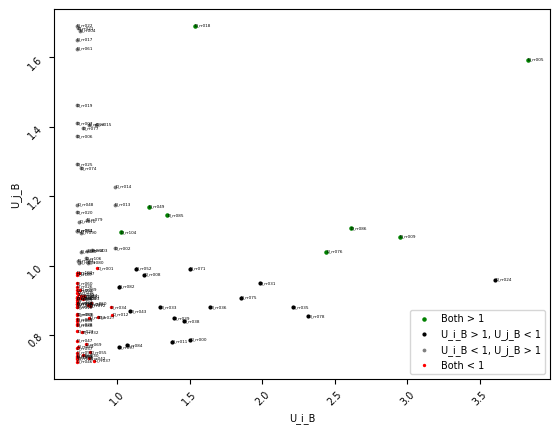

C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['U_i_D'] > 1][df['U_j_D'] > 1]['U_i_D'], df[df['U_i_D'] > 1][df['U_j_D'] > 1]['U_j_D'], color='green', label='Both > 1',s=3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['U_i_D'] > 1][df['U_j_D'] > 1]['U_i_D'], df[df['U_i_D'] > 1][df['U_j_D'] > 1]['U_j_D'], color='green', label='Both > 1',s=3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['U_i_D'] > 1][df['U_j_D'] < 1]['U_i_D'], df[df['U_i_D'] > 1][df['U_j_D'] < 1]['U_j_D'], color='black', label='U_i_D > 1, U_j_D < 1',s=3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:65: UserWarning: Boolean Series key will be reindexed to matc

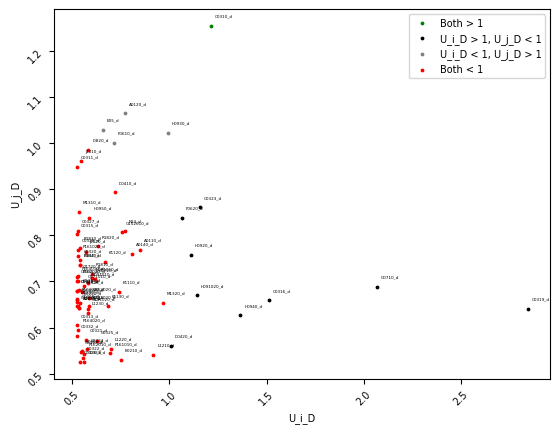

C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['V_i_B'] > 7][df['V_j_B'] > 7]['V_i_B'], df[df['V_i_B'] > 7][df['V_j_B'] > 7]['V_j_B'], color='red', label='Both > 7',s=6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['V_i_B'] > 7][df['V_j_B'] > 7]['V_i_B'], df[df['V_i_B'] > 7][df['V_j_B'] > 7]['V_j_B'], color='red', label='Both > 7',s=6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:105: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['V_i_B'] > 7][df['V_j_B'] < 7]['V_i_B'], df[df['V_i_B'] > 7][df['V_j_B'] < 7]['V_j_B'], color='black', label='V_i_B > 7, V_j_B < 7',s=6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:105: UserWarning: Boolean Series key will be reindexed to matc

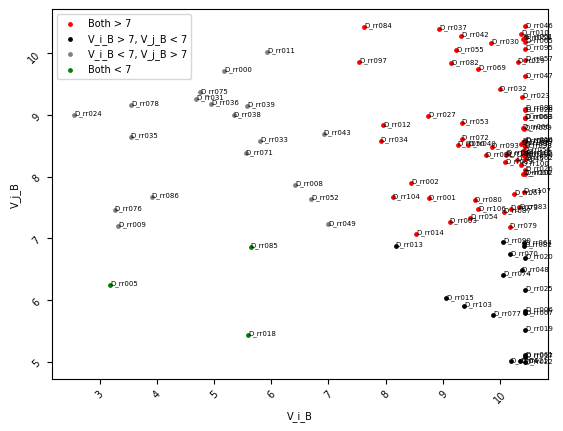

C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:141: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['V_i_D'] > 7][df['V_j_D'] > 7]['V_i_D'], df[df['V_i_D'] > 7][df['V_j_D'] > 7]['V_j_D'], color='red', label='Both > 7',s=6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:141: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['V_i_D'] > 7][df['V_j_D'] > 7]['V_i_D'], df[df['V_i_D'] > 7][df['V_j_D'] > 7]['V_j_D'], color='red', label='Both > 7',s=6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[df['V_i_D'] > 7][df['V_j_D'] < 7]['V_i_D'], df[df['V_i_D'] > 7][df['V_j_D'] < 7]['V_j_D'], color='black', label='V_i_D > 7, V_j_D < 7',s=6)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27956\850409459.py:142: UserWarning: Boolean Series key will be reindexed to matc

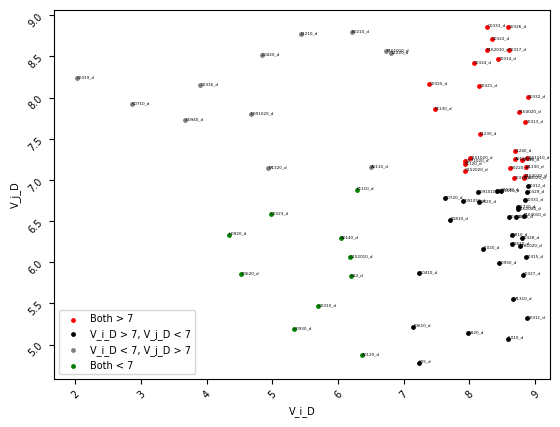

np.float64(7.507726970980985)

In [14]:
#######################################################################################################

import pandas as pd
import matplotlib.pyplot as plt


# Read data from Excel file
file_path = r"D:\py\IO\IO_hormz\hormz_iot_v1400_vf1400_new.xlsx"
df = pd.read_excel(file_path, sheet_name="U_ij_B")

# Define conditions for coloring
def color_map(row):
    if row['U_i_B'] > 1 and row['U_j_B'] > 1:
        return 'green'
    elif row['U_i_B'] > 1 and row['U_j_B'] < 1:
        return 'black'
    elif row['U_i_B'] < 1 and row['U_j_B'] > 1:
        return 'gray'
    else:
        return 'red'

# Apply color mapping
df['color'] = df.apply(color_map, axis=1)

# Plotting
plt.scatter(df[df['U_i_B'] > 1][df['U_j_B'] > 1]['U_i_B'], df[df['U_i_B'] > 1][df['U_j_B'] > 1]['U_j_B'], color='green', label='Both > 1',s=5)
plt.scatter(df[df['U_i_B'] > 1][df['U_j_B'] < 1]['U_i_B'], df[df['U_i_B'] > 1][df['U_j_B'] < 1]['U_j_B'], color='black', label='U_i_B > 1, U_j_B < 1',s=4)
plt.scatter(df[df['U_i_B'] < 1][df['U_j_B'] > 1]['U_i_B'], df[df['U_i_B'] < 1][df['U_j_B'] > 1]['U_j_B'], color='gray', label='U_i_B < 1, U_j_B > 1',s=3)
plt.scatter(df[df['U_i_B'] < 1][df['U_j_B'] < 1]['U_i_B'], df[df['U_i_B'] < 1][df['U_j_B'] < 1]['U_j_B'], color='red', label='Both < 1',s=2)

# Annotate points with sector names
for index, row in df.iterrows():
    plt.annotate(row['rows'], (row['U_i_B'], row['U_j_B']),fontsize=3)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=7)
plt.xlabel('U_i_B', fontsize=7)  # Adjust x-axis label font size
plt.ylabel('U_j_B', fontsize=7)  # Adjust y-axis label font size
plt.xticks(fontsize=7)  # Adjust x-ticks font size
plt.yticks(fontsize=7)  # Adjust y-ticks font sizesave_path = r"D:\latex\IO_ANAL_HORMZ\Uijb.png"
save_path = r"D:\latex\IO_ANAL_HORMZ\Uijb_d.png"
plt.savefig(save_path, dpi=3000, bbox_inches='tight')
plt.show()
#######################################################
#file_path = r"D:\latex\IO_ANAL_HORMZ\hormz_iot_v1400.xlsx"
df = pd.read_excel(file_path, sheet_name="U_ij_D")

# Define conditions for coloring
def color_map(row):
    if row['U_i_D'] > 1 and row['U_j_D'] > 1:
        return 'green'
    elif row['U_i_D'] > 1 and row['U_j_D'] < 1:
        return 'black'
    elif row['U_i_D'] < 1 and row['U_j_D'] > 1:
        return 'gray'
    else:
        return 'red'

# Apply color mapping
df['color'] = df.apply(color_map, axis=1)

# Plotting
plt.scatter(df[df['U_i_D'] > 1][df['U_j_D'] > 1]['U_i_D'], df[df['U_i_D'] > 1][df['U_j_D'] > 1]['U_j_D'], color='green', label='Both > 1',s=3)
plt.scatter(df[df['U_i_D'] > 1][df['U_j_D'] < 1]['U_i_D'], df[df['U_i_D'] > 1][df['U_j_D'] < 1]['U_j_D'], color='black', label='U_i_D > 1, U_j_D < 1',s=3)
plt.scatter(df[df['U_i_D'] < 1][df['U_j_D'] > 1]['U_i_D'], df[df['U_i_D'] < 1][df['U_j_D'] > 1]['U_j_D'], color='gray', label='U_i_D < 1, U_j_D > 1',s=3)
plt.scatter(df[df['U_i_D'] < 1][df['U_j_D'] < 1]['U_i_D'], df[df['U_i_D'] < 1][df['U_j_D'] < 1]['U_j_D'], color='red', label='Both < 1',s=3)

# Annotate points with sector names
for index, row in df.iterrows():
    plt.annotate(row['acts'], (row['U_i_D']+0.02, row['U_j_D']+0.02),fontsize=3)


plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=7)
plt.xlabel('U_i_D', fontsize=7)  # Adjust x-axis label font size
plt.ylabel('U_j_D', fontsize=7)  # Adjust y-axis label font size
plt.xticks(fontsize=7)  # Adjust x-ticks font size
plt.yticks(fontsize=7)  # Adjust y-ticks font size
save_path = r"D:\latex\IO_ANAL_HORMZ\Uijd_d.png"
plt.savefig(save_path, dpi=2000, bbox_inches='tight')
plt.show()
########################################################################################
# Read data from Excel file
#file_path = r"D:\latex\IO_ANAL_HORMZ\hormz_iot_v1400.xlsx"
df = pd.read_excel(file_path, sheet_name="V_ij_B")

# Define conditions for coloring
def color_map(row):
    if row['V_i_B'] > 7 and row['V_j_B'] > 7:
        return 'red'
    elif row['V_i_B'] > 7 and row['V_j_B'] < 7:
        return 'black'
    elif row['V_i_B'] < 7 and row['V_j_B'] > 7:
        return 'gray'
    else:
        return 'green'

# Apply color mapping
df['color'] = df.apply(color_map, axis=1)

# Plotting
plt.scatter(df[df['V_i_B'] > 7][df['V_j_B'] > 7]['V_i_B'], df[df['V_i_B'] > 7][df['V_j_B'] > 7]['V_j_B'], color='red', label='Both > 7',s=6)
plt.scatter(df[df['V_i_B'] > 7][df['V_j_B'] < 7]['V_i_B'], df[df['V_i_B'] > 7][df['V_j_B'] < 7]['V_j_B'], color='black', label='V_i_B > 7, V_j_B < 7',s=6)
plt.scatter(df[df['V_i_B'] < 7][df['V_j_B'] > 7]['V_i_B'], df[df['V_i_B'] < 7][df['V_j_B'] > 7]['V_j_B'], color='gray', label='V_i_B < 7, V_j_B > 7',s=6)
plt.scatter(df[df['V_i_B'] < 7][df['V_j_B'] < 7]['V_i_B'], df[df['V_i_B'] < 7][df['V_j_B'] < 7]['V_j_B'], color='green', label='Both < 7',s=6)

# Annotate points with sector names
for index, row in df.iterrows():
    plt.annotate(row['rows'], (row['V_i_B'], row['V_j_B']),fontsize=5)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=7)
plt.xlabel('V_i_B', fontsize=7)  # Adjust x-axis label font size
plt.ylabel('V_j_B', fontsize=7)  # Adjust y-axis label font size
plt.xticks(fontsize=7)  # Adjust x-ticks font size
plt.yticks(fontsize=7)  # Adjust y-ticks font size
save_path = r"D:\latex\IO_ANAL_HORMZ\Vijb_d.png"
plt.savefig(save_path, dpi=2000, bbox_inches='tight')
plt.show()
########################################################
df = pd.read_excel(file_path, sheet_name="V_ij_D")

# Define conditions for coloring
def color_map(row):
    if row['V_i_D'] > 7 and row['V_j_D'] > 7:
        return 'red'
    elif row['V_i_D'] > 7 and row['V_j_D'] < 7:
        return 'black'
    elif row['V_i_D'] < 7 and row['V_j_D'] > 7:
        return 'gray'
    else:
        return 'green'

# Apply color mapping
df['color'] = df.apply(color_map, axis=1)

# Plotting
plt.scatter(df[df['V_i_D'] > 7][df['V_j_D'] > 7]['V_i_D'], df[df['V_i_D'] > 7][df['V_j_D'] > 7]['V_j_D'], color='red', label='Both > 7',s=6)
plt.scatter(df[df['V_i_D'] > 7][df['V_j_D'] < 7]['V_i_D'], df[df['V_i_D'] > 7][df['V_j_D'] < 7]['V_j_D'], color='black', label='V_i_D > 7, V_j_D < 7',s=6)
plt.scatter(df[df['V_i_D'] < 7][df['V_j_D'] > 7]['V_i_D'], df[df['V_i_D'] < 7][df['V_j_D'] > 7]['V_j_D'], color='gray', label='V_i_D < 7, V_j_D > 7',s=6)
plt.scatter(df[df['V_i_D'] < 7][df['V_j_D'] < 7]['V_i_D'], df[df['V_i_D'] < 7][df['V_j_D'] < 7]['V_j_D'], color='green', label='Both < 7',s=6)

# Annotate points with sector names
for index, row in df.iterrows():
    plt.annotate(row['acts'], (row['V_i_D'], row['V_j_D']),fontsize=3)

plt.xticks(rotation=45 )
plt.yticks(rotation=45)
plt.legend(fontsize=7)
plt.xlabel('V_i_D', fontsize=7)  # Adjust x-axis label font size
plt.ylabel('V_j_D', fontsize=7)  # Adjust y-axis label font size
plt.xticks(fontsize=7)  # Adjust x-ticks font size
plt.yticks(fontsize=7)  # Adjust y-ticks font size
save_path = r"D:\latex\IO_ANAL_HORMZ\Vijd_d.png"
plt.savefig(save_path, dpi=2000, bbox_inches='tight')
plt.show()
#########################

df['V_i_D'].mean()


In [ ]:
df

,acts,V_i_D,V_j_D,color
0,A0110_d,6.505752,7.160649,gray
1,A0120_d,6.362204,4.871276,green
2,A0130_d,8.700928,7.251362,red
3,A0140_d,6.038618,6.294021,green
4,B0210_d,6.209175,8.793194,gray
...,...,...,...,...
74,Q1720_d,8.741745,6.672637,black
75,R1810_d,7.709680,6.518162,black
76,R1820_d,8.142482,6.729475,black
77,R1830_d,8.642196,6.218792,black
